<h1 align='center'>Logistic Regression</h1>

In [3]:
%pylab inline
pylab.style.use('ggplot')
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [4]:
import requests
url = 'http://www.ats.ucla.edu/stat/data/binary.csv'
response = requests.get(url)
response.status_code

200

In [6]:
from io import StringIO
data = pd.read_csv(StringIO(response.text))

In [7]:
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [15]:
data.admit.groupby(data.admit).count()

admit
0    273
1    127
Name: admit, dtype: int64

In [34]:
data['admit'].groupby(data['rank']).value_counts()

rank  admit
1     1        33
      0        28
2     0        97
      1        54
3     0        93
      1        28
4     0        55
      1        12
Name: admit, dtype: int64

In [16]:
data.drop('rank', axis=1).corr()

,admit,gre,gpa
admit,1.000000,0.184434,0.178212
gre,0.184434,1.000000,0.384266
gpa,0.178212,0.384266,1.000000


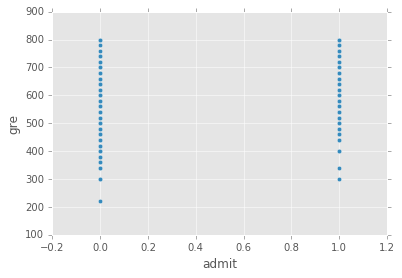

In [17]:
data.plot(kind='scatter', x='admit', y='gre')

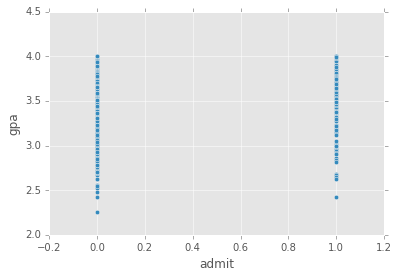

In [18]:
data.plot(kind='scatter', x='admit', y='gpa')

In [55]:
import statsmodels.formula.api as sm

model = sm.logit(formula='admit ~ gpa + C(rank)', data=data)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.578594
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      395
Method:                           MLE   Df Model:                            4
Date:                Mon, 03 Apr 2017   Pseudo R-squ.:                 0.07421
Time:                        21:37:30   Log-Likelihood:                -231.44
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 1.717e-07
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -3.4636      1.100     -3.148      0.002        -5.620    -1.307
C(rank)[T.2]    -0.6810      0.314     -2.168      0.030        -1.297    -0.065
C(rank)[T.3]    -1.3919      0.342     -4.071      0.000        -2.062    -0.722
C(rank)[T.4]    -1.5943      0.415     -3.840      0.000        -2.408    -0.780
gpa              1.0521      0.310      3.392      0.001         0.444     1.660
================================================================================
"""

[[256  17]
 [ 93  34]]


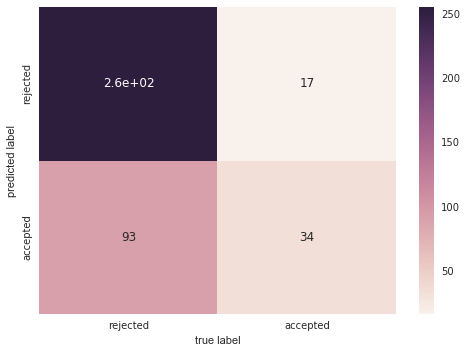

In [58]:
from statsmodels.api import add_constant
predicted_probs = result.predict(data.drop('admit', axis=1))
predicted_ranks = np.where(predicted_probs > 0.5, 1, 0)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_true=data['admit'], y_pred=predicted_ranks)
print(conf_matrix)
conf_df = pd.DataFrame(data=conf_matrix, columns=['rejected', 'accepted'], index=['rejected', 'accepted'])

import seaborn as sns
sns.heatmap(conf_df, annot=True)
pylab.xlabel('true label')
pylab.ylabel('predicted label')